<a href="https://colab.research.google.com/github/ArikusumaWardana/learning-ai/blob/main/Flower_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from google.colab import drive

In [ ]:
# Mount drive ke google colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzip file .zip kedalam folder -d Dataset
!unzip /content/drive/MyDrive/Dataset/flower_data.zip -d Dataset

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/flower_data/daisy/18582579815_4c6637e9ff_m.jpg  
  inflating: Dataset/__MACOSX/flower_data/daisy/._18582579815_4c6637e9ff_m.jpg  
  inflating: Dataset/flower_data/daisy/5434901893_4550be3f84_m.jpg  
  inflating: Dataset/__MACOSX/flower_data/daisy/._5434901893_4550be3f84_m.jpg  
  inflating: Dataset/flower_data/daisy/10172567486_2748826a8b.jpg  
  inflating: Dataset/__MACOSX/flower_data/daisy/._10172567486_2748826a8b.jpg  
  inflating: Dataset/flower_data/daisy/8671824531_64b816949e_m.jpg  
  inflating: Dataset/__MACOSX/flower_data/daisy/._8671824531_64b816949e_m.jpg  
  inflating: Dataset/flower_data/daisy/12193032636_b50ae7db35_n.jpg  
  inflating: Dataset/__MACOSX/flower_data/daisy/._12193032636_b50ae7db35_n.jpg  
  inflating: Dataset/flower_data/daisy/20619292635_9857a12d54.jpg  
  inflating: Dataset/__MACOSX/flower_data/daisy/._20619292635_9857a12d54.jpg  
  inflating: Dataset/flower_data/daisy/9146733107_98b15

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Dataset/flower_data',
    image_size=(128,128)
)

Found 2746 files belonging to 5 classes.


In [ ]:
# Train Dataset menggunakan take dan skip
train_dataset = dataset.take(round(len(dataset)*0.7))
test_dataset = dataset.skip(round(len(dataset)*0.7))

In [ ]:
# Normalisasi Data
train_data = train_dataset.map(lambda x, y: (x/255, y))
test_data = test_dataset.map(lambda x, y: (x/255, y))

In [ ]:
# Create Model CNN

model = models.Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(),
    Conv2D(8, (3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(4, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Training CNN Model
history = model.fit(train_data,epochs=40)

Epoch 1/40
60/60 [==============================] - 16s 236ms/step - loss: 1.5641 - accuracy: 0.2766
Epoch 2/40
60/60 [==============================] - 15s 239ms/step - loss: 1.3805 - accuracy: 0.4068
Epoch 3/40
60/60 [==============================] - 15s 237ms/step - loss: 1.1325 - accuracy: 0.5406
Epoch 4/40
60/60 [==============================] - 15s 239ms/step - loss: 1.0084 - accuracy: 0.6031
Epoch 5/40
60/60 [==============================] - 15s 241ms/step - loss: 0.9619 - accuracy: 0.6250
Epoch 6/40
60/60 [==============================] - 14s 234ms/step - loss: 0.8849 - accuracy: 0.6547
Epoch 7/40
60/60 [==============================] - 14s 231ms/step - loss: 0.8232 - accuracy: 0.6885
Epoch 8/40
60/60 [==============================] - 14s 227ms/step - loss: 0.7698 - accuracy: 0.7010
Epoch 9/40
60/60 [==============================] - 14s 225ms/step - loss: 0.7317 - accuracy: 0.7135
Epoch 10/40
60/60 [==============================] - 14s 231ms/step - loss: 0.6628 - accura

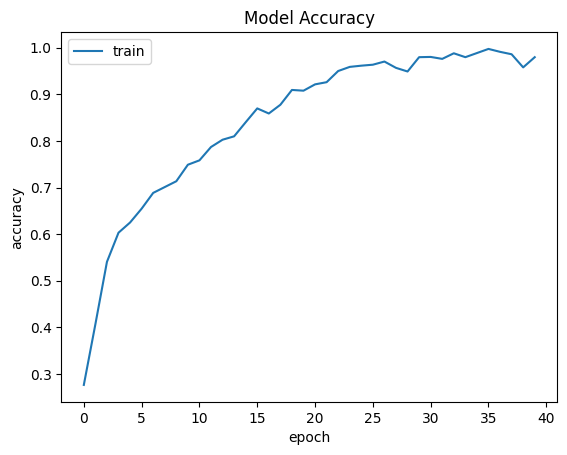

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('model_flower.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
